# Examine filtering results

## Imports

In [1]:
import numpy as np
import h5py
from matplotlib import pyplot as plt

## Load signal and filter output from file

In [2]:
signal_fpath = '/Users/cmcgrory/park_lab/realtime/basic_prototype/data/processed/r11_avg_fr.h5'
with h5py.File(signal_fpath, 'r') as f:
    signal = f['fr_avg_hz'][:]
    
filter_fpath = '/Users/cmcgrory/park_lab/realtime/basic_prototype/julia/output.h5'
with h5py.File(filter_fpath, 'r') as f:
    filter_preds = f['filter_preds'][:]
    rt_times_ms = f['rt_times_ms'][:]

## Plot true and predicted signal values

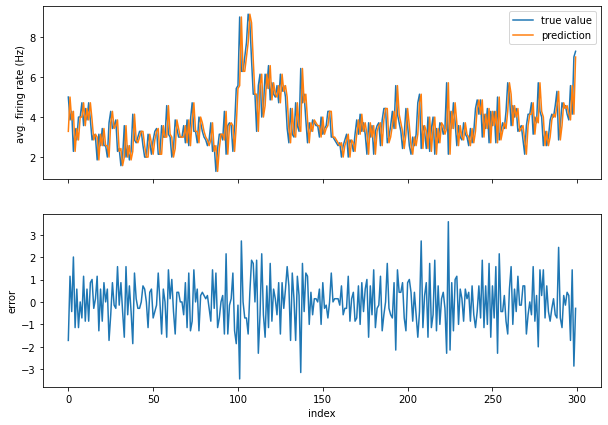

In [3]:
# Number of data points to plot
tmax_plot = 300

# Signal, prediction, and error
signal_plot = signal[1:tmax_plot + 1]
preds_plot = filter_preds[0:tmax_plot]
err_plot = preds_plot - signal_plot

fig, (ax_1, ax_2) = plt.subplots(2, 1, figsize=(10, 7), sharex=True)

ax_1.plot(signal_plot)
ax_1.plot(preds_plot)
ax_1.set(ylabel='avg. firing rate (Hz)')
ax_1.legend(['true value', 'prediction'])

ax_2.plot(err_plot)
ax_2.set(xlabel='index', ylabel='error');

## Latency distribution


### Why are mean and median latency values still so high?

In [4]:
print(f'Max: {np.max(rt_times_ms)}')
print(f'Min: {np.min(rt_times_ms)}')
print(f'Mean: {np.mean(rt_times_ms)}')
print(f'Median: {np.median(rt_times_ms)}')

Max: 474.994
Min: 54.239
Mean: 67.60639689411764
Median: 64.276


### Latency distribution

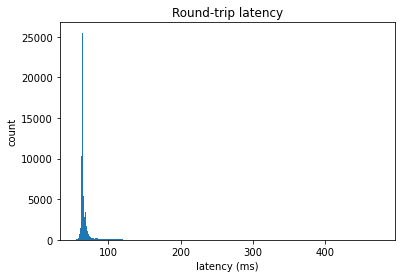

In [5]:
fig, ax = plt.subplots()
ax.hist(rt_times_ms, bins=500)
ax.set(xlabel='latency (ms)', ylabel='count')
ax.set_title('Round-trip latency');

plt.savefig('latency_julia_full.png')

## Latency distribution (outliers removed)

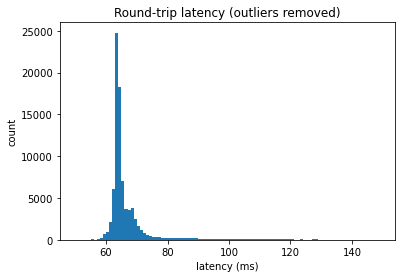

In [6]:
# Max. value for histogram (all larger values will be excluded)
hist_min = 50
hist_max = 150

fig, ax = plt.subplots()
ax.hist(rt_times_ms, bins=range(hist_min, hist_max))
ax.set(xlabel='latency (ms)', ylabel='count')
ax.set_title('Round-trip latency (outliers removed)');

plt.savefig('latency_julia_clipped.png')

In [7]:
idx_missing = (rt_times_ms < hist_min) | (rt_times_ms > hist_max) 
pct_missing = np.count_nonzero(idx_missing) / rt_times_ms.shape[0] * 100
print(f'Percent missing from histogram: {pct_missing:.4f}')

Percent missing from histogram: 0.4435
